## Final Project Submission

Please fill out:
* GROUP 10 MEMBERS:
              1. CHRISTINE MUKIRI
              2. FLAVINE ATIENO
              3. MOURINE MWANGI
              4. SELLAH OTIENO
              
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [1]:
## DATA PREPARATION
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [2]:
#load data and unnecessary columns using pandas
data = pd.read_csv('kc_house_data.csv').drop(['yr_renovated','sqft_lot15','sqft_living15', 'zipcode', 'lat', 'long'], axis=1)
data


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004


In [3]:
#checking 10 random samples
data.sample(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
14022,686450210,11/4/2014,550000.0,4,2.25,1650,7200,1.0,NO,NONE,Average,8 Good,1650,0.0,1967
13659,3179100220,4/27/2015,1030000.0,4,1.75,2110,6708,1.0,NO,GOOD,Average,8 Good,1410,700.0,1941
9799,5426300060,10/8/2014,1000000.0,3,2.25,2300,15952,1.0,NO,NONE,Good,8 Good,1150,1150.0,1963
17894,5100403636,2/23/2015,400000.0,2,1.00,700,8120,1.0,NO,NONE,Average,7 Average,700,0.0,1927
9872,8887001600,4/12/2015,280000.0,2,1.00,990,45528,1.0,NaN,NONE,Good,7 Average,990,0.0,1992
2249,4364700105,8/4/2014,330000.0,3,1.00,1030,7620,1.0,NO,NONE,Average,7 Average,1030,0.0,1953
14250,9547200835,4/2/2015,775000.0,3,1.00,2030,4080,1.5,NO,NONE,Good,7 Average,1840,190.0,1908
11788,2597150270,4/6/2015,312000.0,4,2.50,1790,10584,1.0,NO,NONE,Good,7 Average,1290,500.0,1981
10172,8929000030,8/21/2014,419990.0,3,2.50,1690,1689,2.0,NO,NONE,Average,8 Good,1150,540.0,2014
16403,9238430660,3/26/2015,653000.0,3,2.25,2770,57745,2.0,NO,NONE,Average,8 Good,2770,0.0,1985


In [4]:
data['sqft_basement'] = data['sqft_basement'].astype(str).str.replace(r'[()!@#$%^&*]', '', regex=True)

In [5]:
#data['sqft_basement'] = data['sqft_basement'].astype(str)
#data = data['sqft_basement'].str.replace(r'[()!@#$%^&*]', '', regex=True)

In [6]:
#checking for duplicates using a unique identifier(id)
duplicates = data[data["id"].duplicated()]
duplicates

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
94,6021501535,12/23/2014,700000.0,3,1.50,1580,5000,1.0,NO,NONE,Average,8 Good,1290,290.0,1939
314,4139480200,12/9/2014,1400000.0,4,3.25,4290,12103,1.0,NO,GOOD,Average,11 Excellent,2690,1600.0,1997
325,7520000520,3/11/2015,240500.0,2,1.00,1240,12092,1.0,NO,NONE,Average,6 Low Average,960,280.0,1922
346,3969300030,12/29/2014,239900.0,4,1.00,1000,7134,1.0,NO,NONE,Average,6 Low Average,1000,0.0,1943
372,2231500030,3/24/2015,530000.0,4,2.25,2180,10754,1.0,NO,NONE,Very Good,7 Average,1100,1080.0,1954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20165,7853400250,2/19/2015,645000.0,4,3.50,2910,5260,2.0,NO,NONE,Average,9 Better,2910,0.0,2012
20597,2724049222,12/1/2014,220000.0,2,2.50,1000,1092,2.0,NO,NONE,Average,7 Average,990,10.0,2004
20654,8564860270,3/30/2015,502000.0,4,2.50,2680,5539,2.0,NaN,NONE,Average,8 Good,2680,0.0,2013
20764,6300000226,5/4/2015,380000.0,4,1.00,1200,2171,1.5,NO,NONE,Average,7 Average,1200,0.0,1933


In [7]:
#droping duplicates in the id column
data = data.drop_duplicates(subset = "id", keep = "first")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004


In [8]:
#droping duplicates in the id column
data = data.drop_duplicates(subset = "id", keep = "first")
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,Average,7 Average,1180,0.0,1955
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,Average,8 Good,1600,0.0,2004


In [9]:
#summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21420 non-null  int64  
 1   date           21420 non-null  object 
 2   price          21420 non-null  float64
 3   bedrooms       21420 non-null  int64  
 4   bathrooms      21420 non-null  float64
 5   sqft_living    21420 non-null  int64  
 6   sqft_lot       21420 non-null  int64  
 7   floors         21420 non-null  float64
 8   waterfront     19067 non-null  object 
 9   view           21357 non-null  object 
 10  condition      21420 non-null  object 
 11  grade          21420 non-null  object 
 12  sqft_above     21420 non-null  int64  
 13  sqft_basement  21420 non-null  object 
 14  yr_built       21420 non-null  int64  
dtypes: float64(3), int64(6), object(6)
memory usage: 2.6+ MB


In [10]:
#checking the number of missing values
sum_missing_values = data.isna().sum()
sum_missing_values

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2353
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
dtype: int64

In [11]:
total_data = data.shape[0]


In [12]:
# percentage missing value for each column is calculated by dividing sum of each column by len of the whole data
percentage_missing_values = sum_missing_values/total_data *100
#creating a dataframe with the above infor and assign it missing_values_df
missing_values_df =pd.DataFrame({
      'missing values':sum_missing_values,
      'percentage missing values':percentage_missing_values
})
missing_values_df

,missing values,percentage missing values
id,0,0.000000
date,0,0.000000
price,0,0.000000
bedrooms,0,0.000000
bathrooms,0,0.000000
sqft_living,0,0.000000
sqft_lot,0,0.000000
floors,0,0.000000
waterfront,2353,10.985061
view,63,0.294118


Dropping rows with missing values in waterfront and view column
Column view has only 0.2% missing values in relation to total data
Column waterfront has only 10.9% missing values in relation to total data
In this regard we drop the rows with the missing values as it wont have any significant impact on our analysis.

In [13]:
#dropping missing values
data.dropna(subset = ["waterfront", "view"], inplace=True)

In [14]:
data['sqft_basement'] = data['sqft_basement'].replace('?', '0').astype(float)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19010 entries, 1 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             19010 non-null  int64  
 1   date           19010 non-null  object 
 2   price          19010 non-null  float64
 3   bedrooms       19010 non-null  int64  
 4   bathrooms      19010 non-null  float64
 5   sqft_living    19010 non-null  int64  
 6   sqft_lot       19010 non-null  int64  
 7   floors         19010 non-null  float64
 8   waterfront     19010 non-null  object 
 9   view           19010 non-null  object 
 10  condition      19010 non-null  object 
 11  grade          19010 non-null  object 
 12  sqft_above     19010 non-null  int64  
 13  sqft_basement  19010 non-null  float64
 14  yr_built       19010 non-null  int64  
dtypes: float64(4), int64(6), object(5)
memory usage: 2.3+ MB


In [16]:
data['date'] = pd.to_datetime(data['date'])
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2015-02-19,475000.0,3,2.50,1310,1294,2.0,NO,NONE,Average,8 Good,1180,130.0,2008
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009


In [17]:
data["year_sold"] = pd.DatetimeIndex(data["date"]).year
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,year_sold
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,2015
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,2014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2015-02-19,475000.0,3,2.50,1310,1294,2.0,NO,NONE,Average,8 Good,1180,130.0,2008,2015
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,2014
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,2015
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,2014


In [18]:
data["Age"] = data["year_sold"] - data["yr_built"]
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,year_sold,Age
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,2014,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,2014,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,2015,28
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,2014,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2015-02-19,475000.0,3,2.50,1310,1294,2.0,NO,NONE,Average,8 Good,1180,130.0,2008,2015,7
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,Average,8 Good,1530,0.0,2009,2014,5
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,Average,8 Good,2310,0.0,2014,2015,1
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,Average,7 Average,1020,0.0,2009,2014,5


###MODELLING

In [19]:
# Importing libraries
import statsmodels.api as sm
import scipy.stats as stats
import seaborn as sns

In [20]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,year_sold,Age
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,Average,7 Average,2170,400.0,1951,2014,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,Average,6 Low Average,770,0.0,1933,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,Very Good,7 Average,1050,910.0,1965,2014,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,Average,8 Good,1680,0.0,1987,2015,28
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,Average,11 Excellent,3890,1530.0,2001,2014,13


In [21]:
#data['sqft_basement'] = data['sqft_basement'].replace('?', '0').astype(float)
#data_copy = data.copy()
#data_copy.dropna(subset = ["waterfront", "view"], inplace=True)

In [22]:
# creation of dummy variables for our categorical variables
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19010 entries, 1 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19010 non-null  int64         
 1   date           19010 non-null  datetime64[ns]
 2   price          19010 non-null  float64       
 3   bedrooms       19010 non-null  int64         
 4   bathrooms      19010 non-null  float64       
 5   sqft_living    19010 non-null  int64         
 6   sqft_lot       19010 non-null  int64         
 7   floors         19010 non-null  float64       
 8   waterfront     19010 non-null  object        
 9   view           19010 non-null  object        
 10  condition      19010 non-null  object        
 11  grade          19010 non-null  object        
 12  sqft_above     19010 non-null  int64         
 13  sqft_basement  19010 non-null  float64       
 14  yr_built       19010 non-null  int64         
 15  year_sold      1901

In [23]:
# we now look correlation of the independent variables with respect to price
data.corr()['price']

id              -0.019609
price            1.000000
bedrooms         0.309561
bathrooms        0.526999
sqft_living      0.704473
sqft_lot         0.086576
floors           0.258048
sqft_above       0.609511
sqft_basement    0.318781
yr_built         0.052438
year_sold        0.006079
Age             -0.052343
Name: price, dtype: float64

In [24]:
data = pd.get_dummies(data, columns=["waterfront","view","condition","grade"], drop_first=True, dtype=int)

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19010 entries, 1 to 21596
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   19010 non-null  int64         
 1   date                 19010 non-null  datetime64[ns]
 2   price                19010 non-null  float64       
 3   bedrooms             19010 non-null  int64         
 4   bathrooms            19010 non-null  float64       
 5   sqft_living          19010 non-null  int64         
 6   sqft_lot             19010 non-null  int64         
 7   floors               19010 non-null  float64       
 8   sqft_above           19010 non-null  int64         
 9   sqft_basement        19010 non-null  float64       
 10  yr_built             19010 non-null  int64         
 11  year_sold            19010 non-null  int64         
 12  Age                  19010 non-null  int64         
 13  waterfront_YES       19010 non-

Output above indicates that sqft_living, bathrooms,bedrooms,floors, and sqft_above have correlation with price.

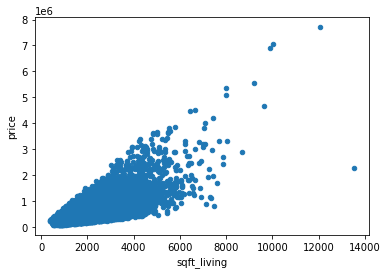

In [26]:
#For multiple linear regression, we typically build a simple linear regression to be that baseline.
#Since sqft_living is the feature with the strongest correlation, we build a simple linear regression with it.
data.plot.scatter(x="sqft_living", y="price");

In [27]:
y = data["price"]
X_baseline = data[["sqft_living"]]

In [28]:
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.496
Model:                            OLS   Adj. R-squared:                  0.496
Method:                 Least Squares   F-statistic:                 1.873e+04
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:23:32   Log-Likelihood:            -2.6426e+05
No. Observations:               19010   AIC:                         5.285e+05
Df Residuals:                   19008   BIC:                         5.285e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.961e+04   4726.133    -10.496      

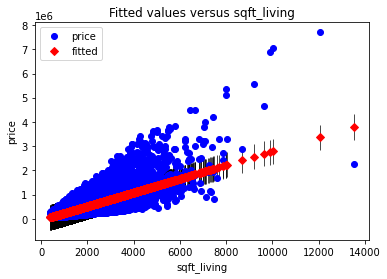

In [29]:
# actual vs predicted values
sm.graphics.plot_fit(baseline_results, "sqft_living")
plt.show()

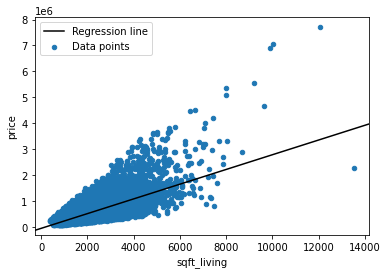

In [30]:
# the regression line
fig, ax = plt.subplots()
data.plot.scatter(x="sqft_living", y="price", label="Data points", ax=ax)
sm.graphics.abline_plot(model_results=baseline_results, label="Regression line", ax=ax, color="black")
ax.legend();

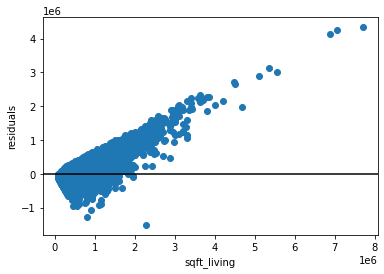

In [31]:
# we plot the residuals
fig, ax = plt.subplots()

ax.scatter(data["price"], baseline_results.resid)
ax.axhline(y=0, color="black")
ax.set_xlabel("sqft_living")
ax.set_ylabel("residuals");

In [32]:
# we now try using two variables,we see whether our model will improve
# we now add sqft_above as it a strong correlation too
X_baseline = data[["sqft_living", "sqft_above"]]
baseline_model = sm.OLS(y, sm.add_constant(X_baseline))
baseline_results = baseline_model.fit()

print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.497
Model:                            OLS   Adj. R-squared:                  0.497
Method:                 Least Squares   F-statistic:                     9376.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:23:35   Log-Likelihood:            -2.6426e+05
No. Observations:               19010   AIC:                         5.285e+05
Df Residuals:                   19007   BIC:                         5.285e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.717e+04   4773.697     -9.881      

The first model had r-squared of 0.496 and the second model has r-squared of of 0.497. Meaning a slight improvement of the model

In [33]:
X_all = data.drop("price", axis=1).select_dtypes("number")
X_all

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,yr_built,year_sold,...,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better
1,6414100192,3,2.25,2570,7242,2.0,2170,400.0,1951,2014,...,0,0,0,0,0,0,0,1,0,0
2,5631500400,2,1.00,770,10000,1.0,770,0.0,1933,2015,...,0,0,0,0,0,0,1,0,0,0
3,2487200875,4,3.00,1960,5000,1.0,1050,910.0,1965,2014,...,0,0,0,0,0,0,0,1,0,0
4,1954400510,3,2.00,1680,8080,1.0,1680,0.0,1987,2015,...,0,0,0,0,0,0,0,0,1,0
5,7237550310,4,4.50,5420,101930,1.0,3890,1530.0,2001,2014,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,3,2.50,1310,1294,2.0,1180,130.0,2008,2015,...,0,0,0,0,0,0,0,0,1,0
21592,263000018,3,2.50,1530,1131,3.0,1530,0.0,2009,2014,...,0,0,0,0,0,0,0,0,1,0
21593,6600060120,4,2.50,2310,5813,2.0,2310,0.0,2014,2015,...,0,0,0,0,0,0,0,0,1,0
21594,1523300141,2,0.75,1020,1350,2.0,1020,0.0,2009,2014,...,0,0,0,0,0,0,0,1,0,0


In [34]:
third_model = sm.OLS(y, sm.add_constant(X_all))
third_results = third_model.fit()

print(third_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     1426.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:23:35   Log-Likelihood:            -2.5979e+05
No. Observations:               19010   AIC:                         5.196e+05
Df Residuals:                   18980   BIC:                         5.199e+05
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.258e+07   6

From the above ouput we drop all the variables that are not statistically significant

In [35]:
X_final = data.drop(columns=["date","price","condition_Poor","sqft_basement","sqft_above","id"])
X_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19010 entries, 1 to 21596
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   bedrooms             19010 non-null  int64  
 1   bathrooms            19010 non-null  float64
 2   sqft_living          19010 non-null  int64  
 3   sqft_lot             19010 non-null  int64  
 4   floors               19010 non-null  float64
 5   yr_built             19010 non-null  int64  
 6   year_sold            19010 non-null  int64  
 7   Age                  19010 non-null  int64  
 8   waterfront_YES       19010 non-null  int32  
 9   view_EXCELLENT       19010 non-null  int32  
 10  view_FAIR            19010 non-null  int32  
 11  view_GOOD            19010 non-null  int32  
 12  view_NONE            19010 non-null  int32  
 13  condition_Fair       19010 non-null  int32  
 14  condition_Good       19010 non-null  int32  
 15  condition_Very Good  19010 non-null 

In [36]:
# we now run another model that does not have the statistically insignificant variables
fourth_model = sm.OLS(y, sm.add_constant(X_final))
fourth_results = fourth_model.fit()

print(fourth_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.684
Method:                 Least Squares   F-statistic:                     1649.
Date:                Sun, 10 Sep 2023   Prob (F-statistic):               0.00
Time:                        20:23:36   Log-Likelihood:            -2.5981e+05
No. Observations:               19010   AIC:                         5.197e+05
Df Residuals:                   18984   BIC:                         5.199e+05
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const               -4.224e+07   6

### INTERPRETATION
all the variables in this model are statistically significant.
The model is general is also signicant as the F-Statistic is statistically significant at alpha = 0.05
The coefficent of determination ie R-Squared = 0.685, meaning 68.5 percent of variations in the model are explained by the model.
Variables bathrooms & sqft_living have a positive coefficient meaning a unit increase in the variables increases price of the house.

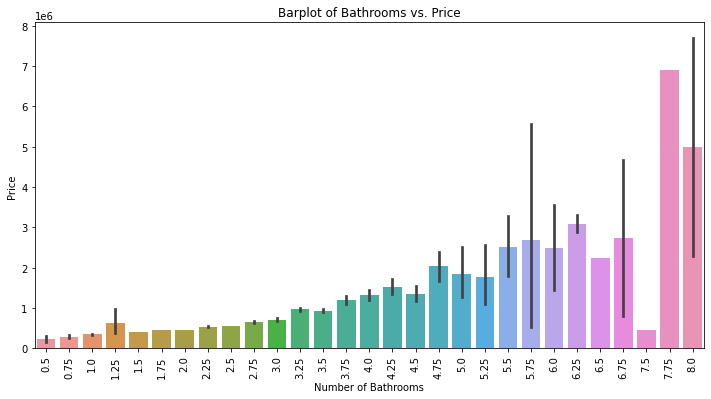

In [41]:
# Group and plot the data
plt.figure(figsize=(12, 6))
sns.barplot(x="bathrooms", y="price", data=data)
plt.title("Barplot of Bathrooms vs. Price")
plt.xlabel("Number of Bathrooms")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()

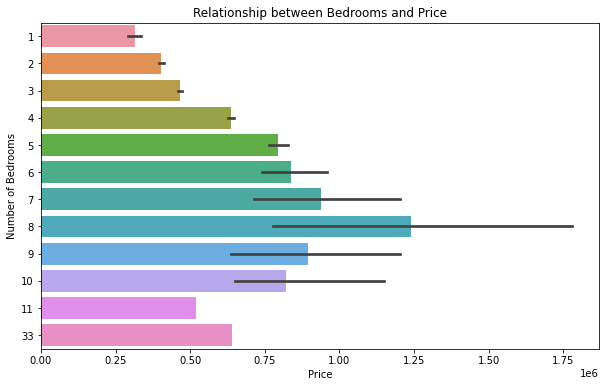

In [38]:
# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='bedrooms', data=data, orient='h')
plt.xlabel('Price')
plt.ylabel('Number of Bedrooms')
plt.title('Relationship between Bedrooms and Price')
plt.show()

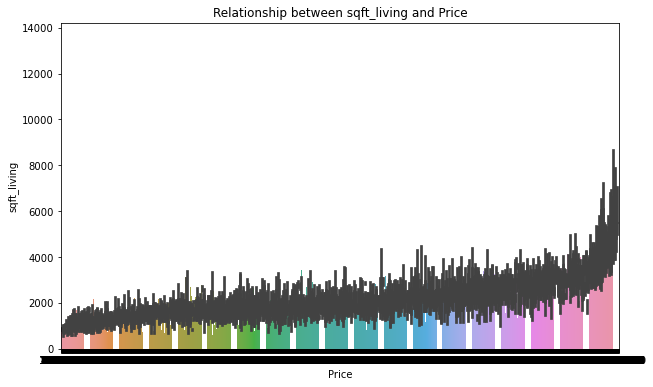

In [43]:
plt.figure(figsize=(10, 6))
sns.barplot(x='price', y='sqft_living', data=data)
plt.xlabel('Price')
plt.ylabel('sqft_living')
plt.title('Relationship between sqft_living and Price')
plt.show()

### RECOMMENDATIONS
The research indicates factors that cause increased house price include:
The size of the living area; Stakeholders in the real estate industry should increase the size of the living room for them to have an edge in the market.
Stakeholders should ensure that their property is well maintained in order as this factor is a great driver when it comes to the issue of house pricing.
According the Market trend the construction and design of the house plays a great role in pricing houses. Luxury houses being the most expensive, followed by Mansions.


### CONCLUSION
The homeowners implement the shared recommendations,They willbe in a position to set the selling prices of the houses without underquoting or over quotingbut be within market price and make high sales.